In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor,Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_validate
from sklearn.svm import SVR


In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [4]:
housing = pd.read_csv("train.csv")
housing_test = pd.read_csv("test.csv")

In [5]:
categorical = []
for i in housing.columns:
    if housing[i].dtype == object:
        categorical.append(i)
categorical

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [6]:
housing = housing.drop(columns = categorical)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

**check missing values**

In [7]:
total = housing.isnull().sum().sort_values(ascending=False)
percent = (housing.isnull().sum()/housing.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
Id,0,0.000000
OpenPorchSF,0,0.000000


In [8]:
housing = housing.fillna(housing.median())
housing.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

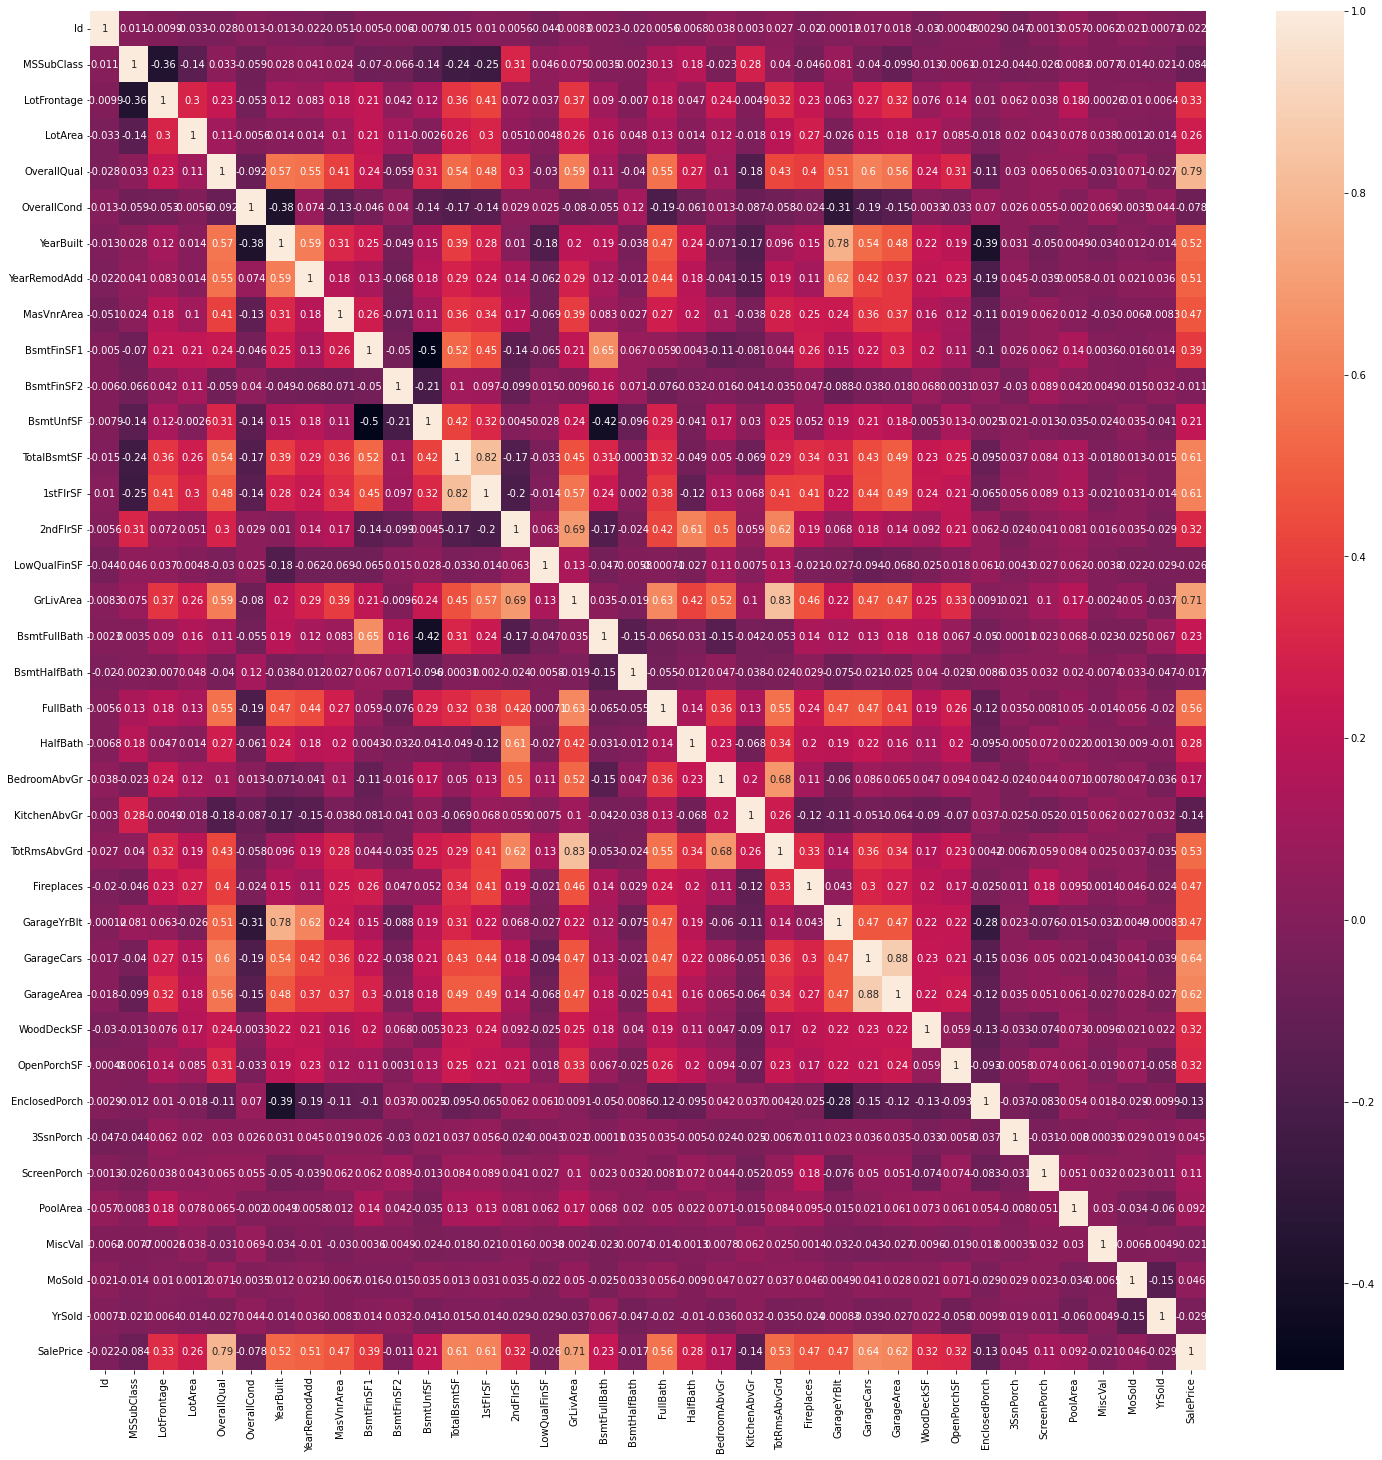

In [9]:
corr = housing.corr()
corr
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot = True)
plt.show()


Variables with High Correlations
YearBuilt and GarageYrBlt = 0.78
TotalBsmtSF, 1stFlrSF = 0.83
GarageCars, GarageArea = 0.88 **bold text**

In [10]:
housing = housing.drop(columns = ['GarageYrBlt', '1stFlrSF', 'GarageArea']).set_index('Id')
housing

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


In [11]:
corr_price = housing.corr()["SalePrice"].sort_values(ascending = False)
corr_price

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
TotalBsmtSF      0.613581
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

**Checking for skewed features**

In [12]:
skewed_col = []
for i in housing.columns:
    if housing[i].skew() > 0.5:
        skewed_col.append(i)


In [13]:
len(skewed_col)

26

In [14]:
housing[skewed_col] = housing[skewed_col].apply(lambda i: np.log1p(i))

In [15]:
x = housing.iloc[:,:-1]
y = housing.iloc[: , -1]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


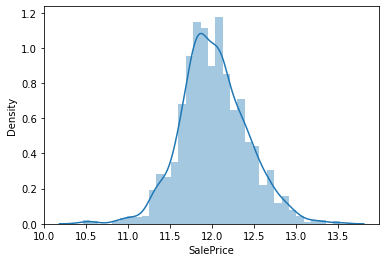

In [16]:
#Checking the distribution of the dependent variable
sns.distplot(y)

In [17]:
#Standardizing the Data
sc = StandardScaler()
x = sc.fit_transform(x)

In [18]:
lr = LinearRegression()
cv_lr = cross_validate(lr,x, y,cv = 10,scoring = 'neg_root_mean_squared_error')
cv_lr['test_score'].mean()

-0.13768656913072955

In [19]:
svr = SVR(kernel = 'linear', C =1)
cv_svr = cross_validate(svr,x, y,cv = 10,scoring = 'neg_root_mean_squared_error')
cv_svr['test_score'].mean()

-0.1371480365616031

In [20]:
sgd = SGDRegressor()
cv_sgd = cross_validate(sgd,x, y,cv = 10,scoring = 'neg_root_mean_squared_error')
cv_sgd['test_score'].mean()

-0.13935882335031174

In [21]:
ridge = Ridge()
cv_r = cross_validate(ridge,x, y,cv = 10,scoring = 'neg_root_mean_squared_error')
cv_r['test_score'].mean()

-0.1376769122271109

In [22]:
lasso = Lasso(alpha = 0.001)
cv_l = cross_validate(lasso,x, y,cv = 10,scoring = 'neg_root_mean_squared_error')
cv_l['test_score'].mean()

-0.13732082074828153

**Elastic Net**

In [25]:
en = ElasticNet(alpha = 0.001)
cv_en = cross_validate(en,x, y,cv = 10,scoring = 'neg_root_mean_squared_error')
cv_en['test_score'].mean()

-0.13744602975644896

In [23]:
housing_test = housing_test.drop(columns = categorical)

In [24]:
housing_test = housing_test.drop(columns = ['GarageYrBlt', '1stFlrSF', 'GarageArea']).set_index('Id')

In [26]:
total_test = housing_test.isnull().sum().sort_values(ascending=False)
percent_test = (housing_test.isnull().sum()/housing.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([total_test, percent_test], axis=1, keys=['Total', 'Percent'])
missing_data_test.head(10)

,Total,Percent
LotFrontage,227.0,0.155479
MasVnrArea,15.0,0.010274
BsmtHalfBath,2.0,0.001370
BsmtFullBath,2.0,0.001370
BsmtFinSF1,1.0,0.000685
GarageCars,1.0,0.000685
TotalBsmtSF,1.0,0.000685
BsmtFinSF2,1.0,0.000685
BsmtUnfSF,1.0,0.000685
3SsnPorch,0.0,0.000000


In [27]:
housing_test = housing_test.fillna(housing_test.median())

In [28]:
skewed_col_test = []
for i in housing_test.columns:
    if housing_test[i].skew()>0.5:
        skewed_col_test.append(i)
skewed_col_test

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [29]:
housing_test[skewed_col[:-1]] = housing_test[skewed_col[:-1]].apply(lambda i: np.log1p(i))

In [30]:
housing_test = sc.transform(housing_test)

In [31]:
final = SVR(kernel = 'linear', C =1)
final.fit(x,y)

SVR(C=1, kernel='linear')

In [32]:
pred = np.expm1(final.predict(housing_test))
pred

array([119444.54693341, 148040.49778171, 182085.26255185, ...,
       178213.49055295, 116273.56740496, 243121.27124816])

In [33]:
submission = pd.DataFrame({'Id': range(1461, 1461 + len(housing_test)), 'SalePrice': pred})

In [34]:
submission.to_csv('submission.csv', index = False)